# <b> Problem Statemnet <b/>

# <b> AN X Education company need help to connert their leads into paying customer . The company requires a model <b/>

In [1]:
## importing all libraries ##

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# <b> Loading Data <b/>

In [2]:
df= pd.read_csv('leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# <b> Inspecting the data <b/>

In [3]:
## using info function ##

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
## checking the shape of the data ##

df.shape

(9240, 37)

In [5]:
## to get the values and their info ##

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# <b> Data Cleaning <b/>

In [6]:
# converting lower case ##

df=df.applymap(lambda s: s.lower()if type(s)==str else s)

In [7]:
# replacing NAN values ##
df= df.replace('select',np.nan)

In [8]:
# checking unique value ##

df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
df1= df.drop(["Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],axis=1)


In [10]:
# checking the % of misssing values ##

round(100*(df1.isnull().sum()/len(df1.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [11]:
# removing all the columns having 35% or more missing values ##

df2=df1.drop(["Asymmetrique Activity Index","Asymmetrique Profile Index",'Asymmetrique Activity Score',"Asymmetrique Profile Score","Lead Profile","Lead Quality","City","How did you hear about X Education","Tags"],axis=1)

In [12]:
df2.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [13]:
## again cheking the null ##
round(100*(df2.isnull().sum()/len(df2.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

<b> we can remove the specialization becuse its important data so we replacing it with "not provided"<b/>

In [14]:
df2["Specialization"]=df2['Specialization'].fillna('not provided')
df2["Country"]=df2['Country'].fillna('not provided')
df2["What is your current occupation"]=df2['What is your current occupation'].fillna('not provided')
df2["What matters most to you in choosing a course"]=df2['What matters most to you in choosing a course'].fillna('not provided')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [15]:
round(100*(df2.isnull().sum()/len(df2.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [16]:
df2["Country"].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [17]:
def slots(x):
    category=""
    if x == "india":
        category="india"
    elif x== "not provided":
        category="not provided"
    else:
        category = "outside india"
    return category

df2['Country'] = df2.apply(lambda x: slots(x['Country']),axis=1)
df2['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [18]:
## again cheking the null ##
round(100*(df2.isnull().sum()/len(df2.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [19]:
## checking % of lose if null values removed ##


round(100*(sum(df2.isnull().sum(axis=1) >1)/df2.shape[0]),2)

1.48

In [20]:
df3=df2[df2.isnull().sum(axis=1)<1]

In [21]:
round(100*(df3.shape[0])/(df.shape[0]),2)

98.2

In [22]:
## again cheking the null ##
round(100*(df3.isnull().sum()/len(df3.index)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [23]:
## for categorical values ##

for column in df3:
    print(df3[column].astype('category').value_counts())
    print('----------------------------------------------------------------------')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9074, dtype: int64
----------------------------------------------------------------------
579533    1
630088    1
630039    1
630041    1
630042    1
         ..
602403    1
602402    1
602392    1
602388    1
660737    1
Name: Lead Number, Length: 9074, dtype: int64
----------------------------------------------------------------------
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
------------

In [24]:
## removing the id values because they are unique ##

df4= df3.drop('Prospect ID',1)
df4.shape

(9074, 22)

# <b> EDA <b/>

In [25]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

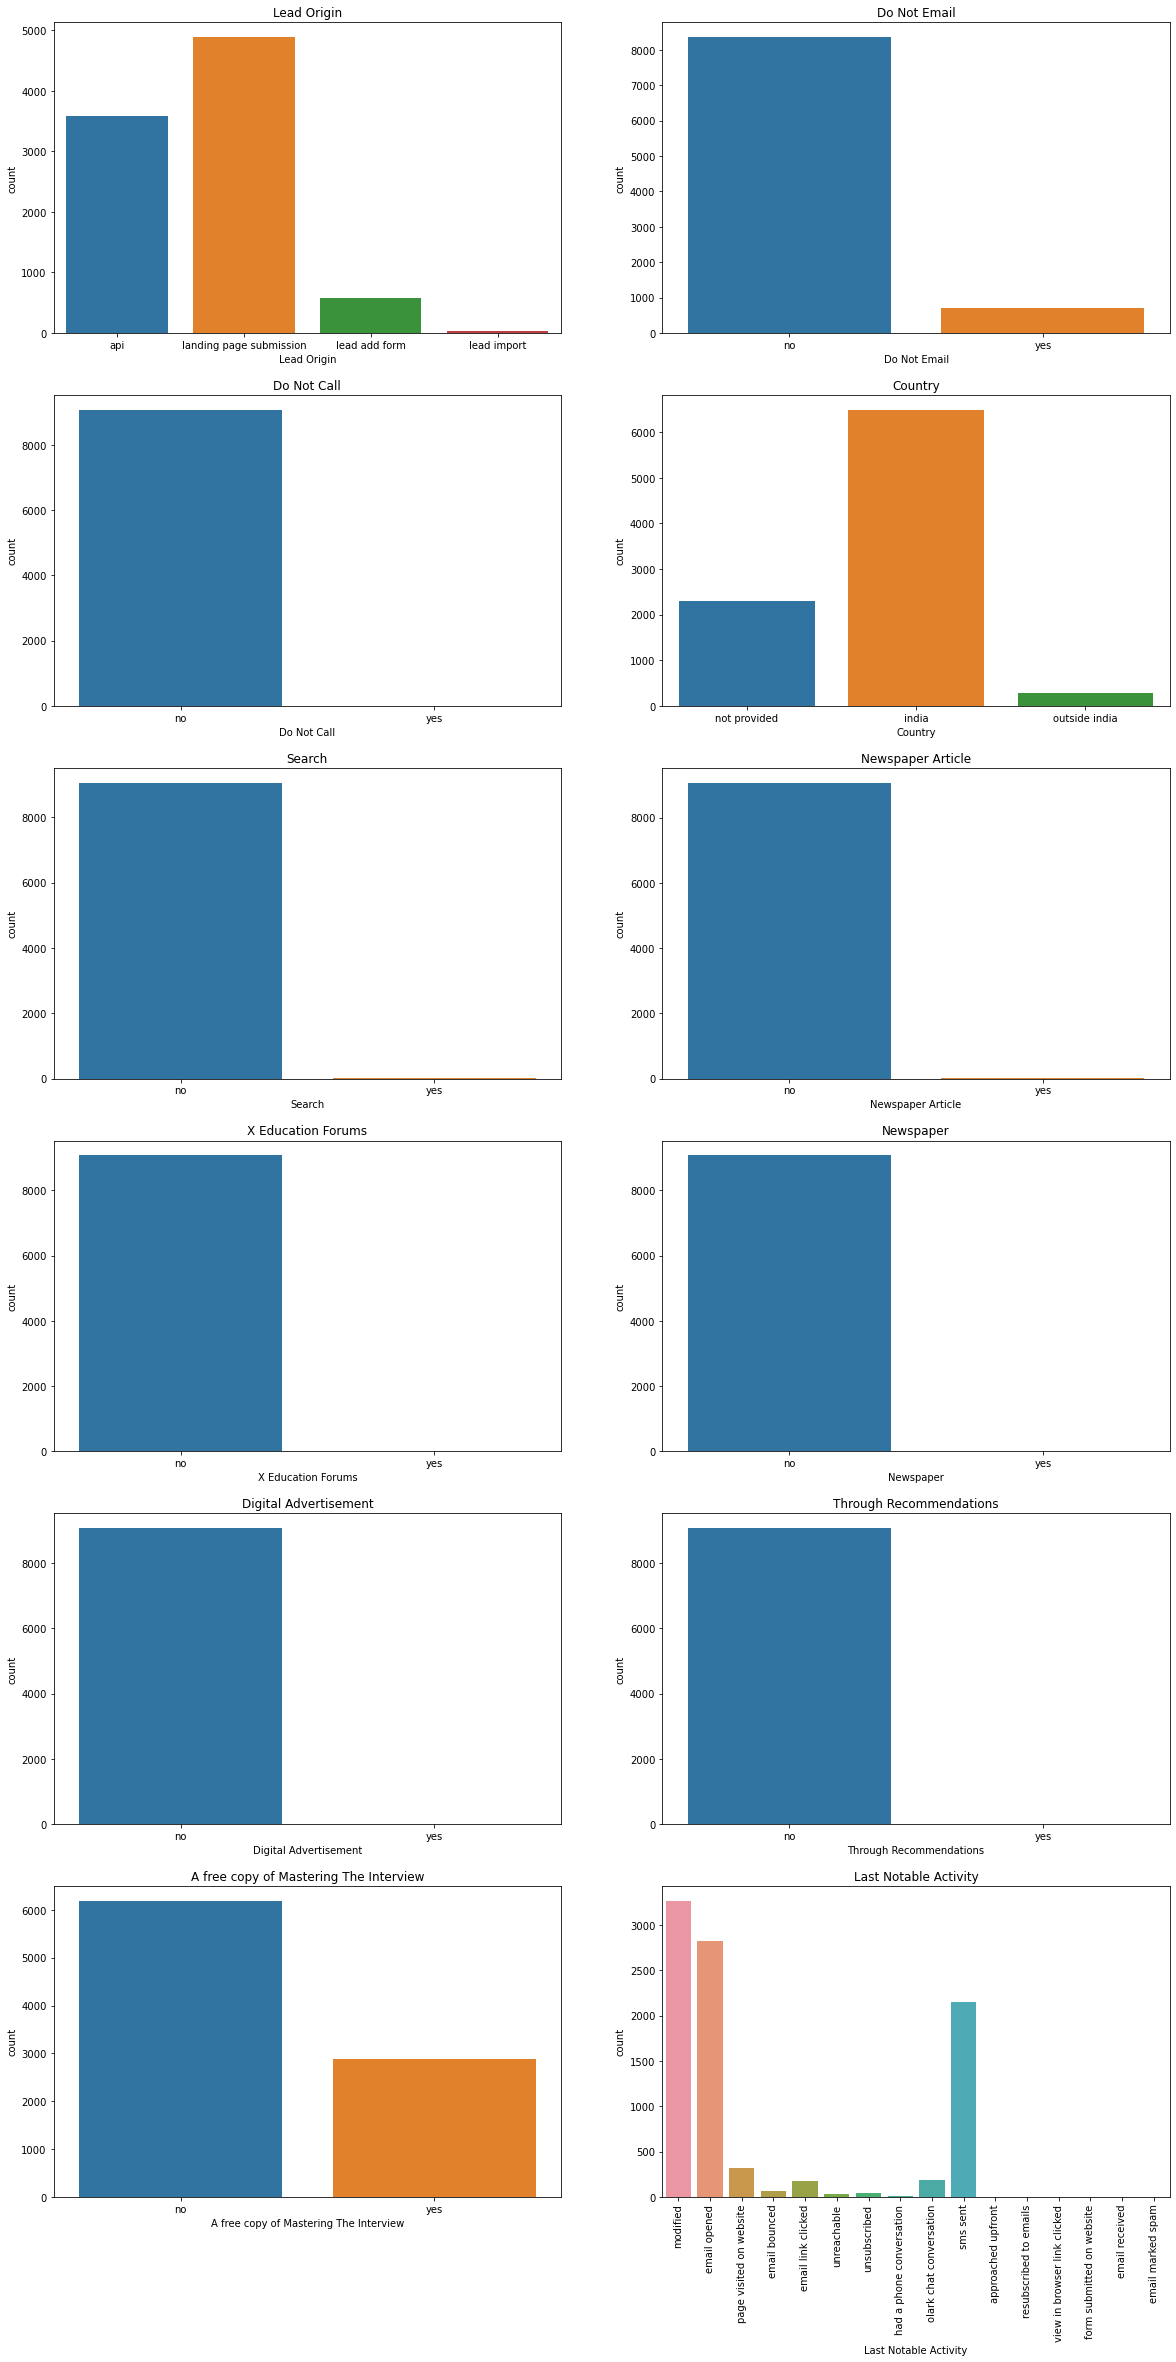

In [26]:
## plotting graphs to see things clearly ##

plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df4['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df4['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df4['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df4['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(df4['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df4['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df4['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df4['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df4['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df4['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df4['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df4['Last Notable Activity']).tick_params(axis='x',rotation=90)
plt.title('Last Notable Activity')


plt.show()

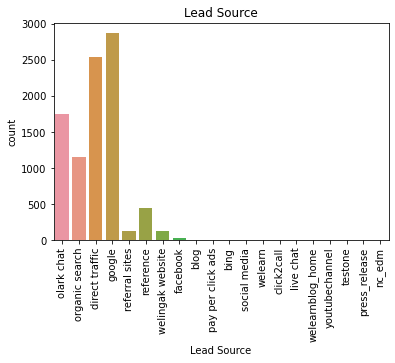

In [27]:
sns.countplot(df4['Lead Source']).tick_params(axis='x',rotation=90)
plt.title('Lead Source')
plt.show()

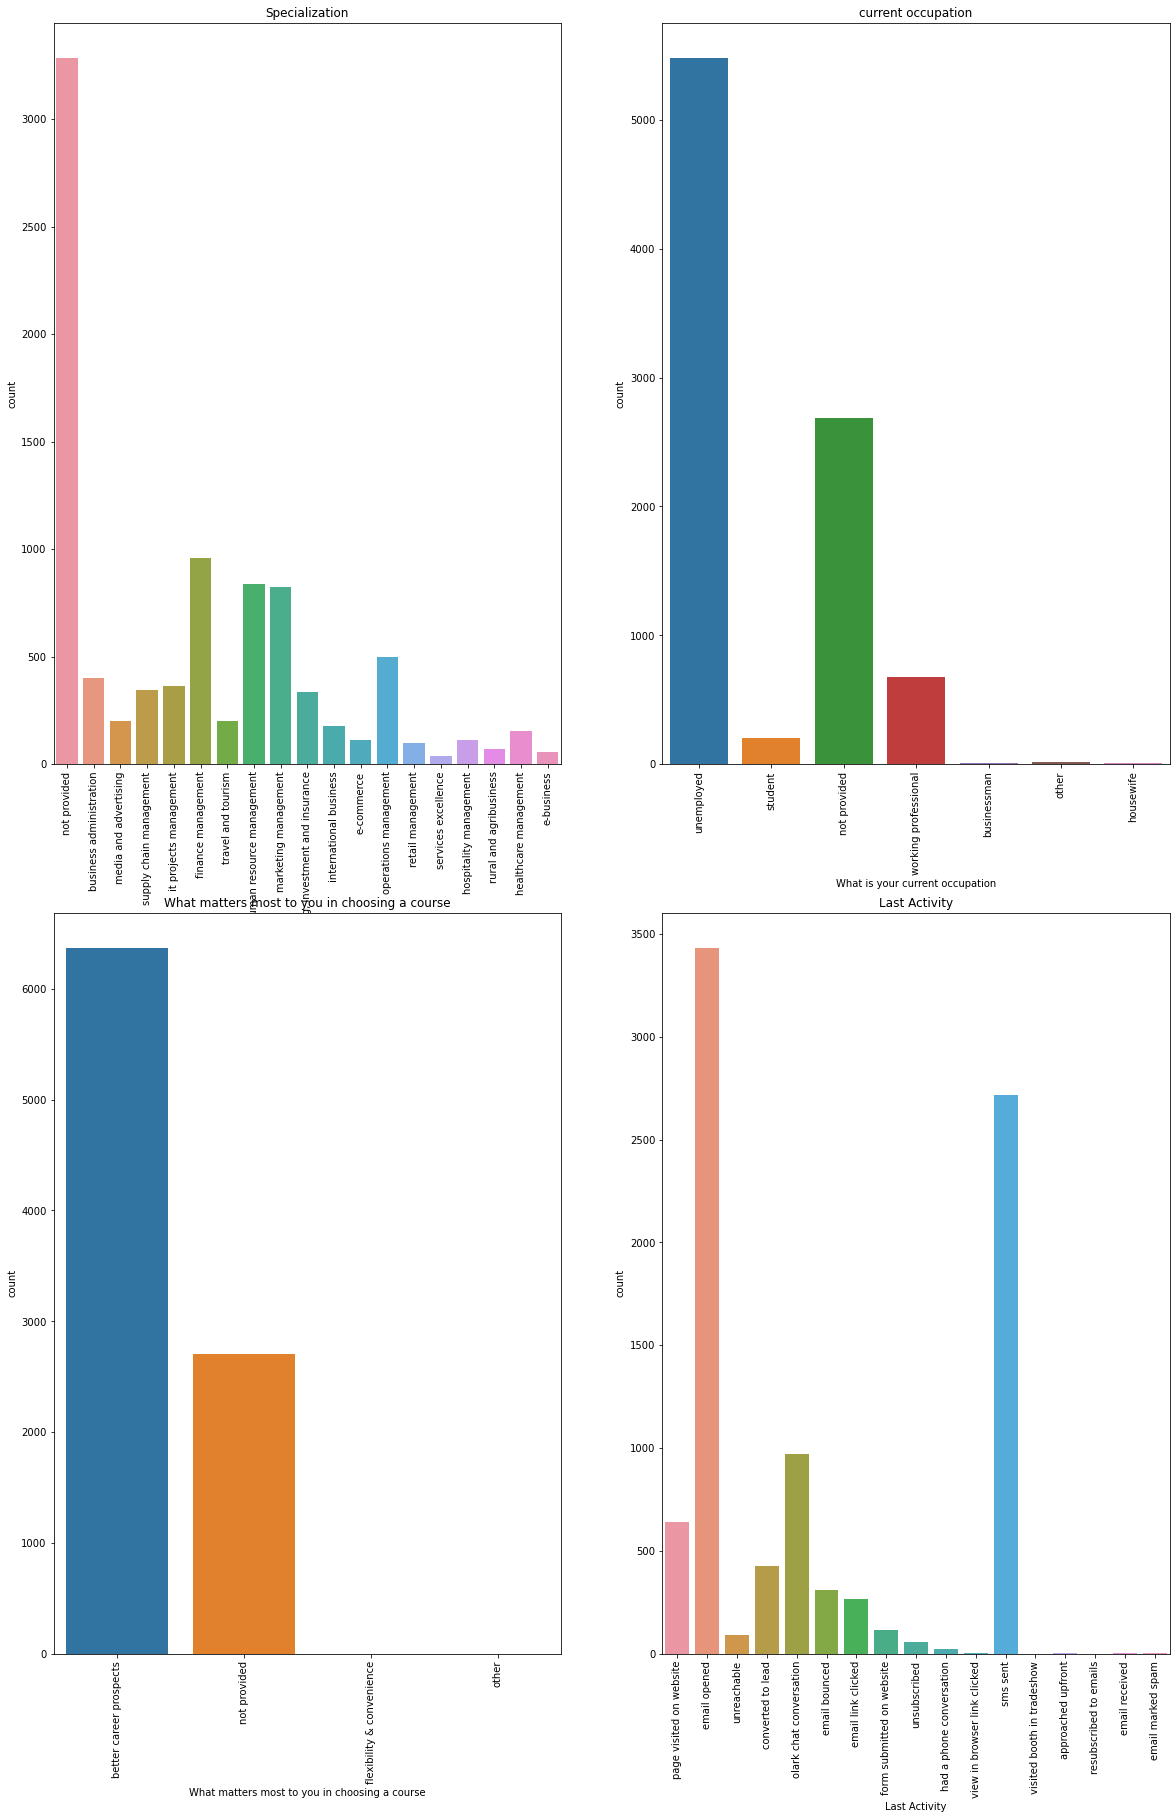

In [28]:
plt.figure(figsize=(20,30))
plt.subplot(2,2,1)
sns.countplot(df4['Specialization']).tick_params(axis='x',rotation=90)
plt.title('Specialization')

plt.subplot(2,2,2)
sns.countplot(df4['What is your current occupation']).tick_params(axis='x',rotation=90)
plt.title('current occupation')

plt.subplot(2,2,3)
sns.countplot(df4['What matters most to you in choosing a course']).tick_params(axis='x',rotation=90)
plt.title('What matters most to you in choosing a course')

plt.subplot(2,2,4)
sns.countplot(df4['Last Activity']).tick_params(axis='x',rotation=90)
plt.title('Last Activity')

plt.show()

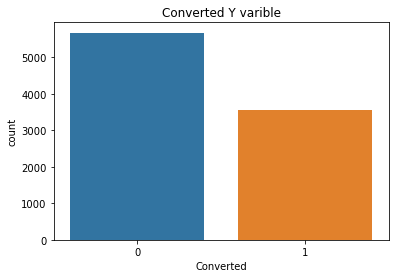

In [29]:
sns.countplot(df['Converted'])
plt.title('Converted Y varible')
plt.show()

# <b> Numerical Variables <b/>

In [30]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

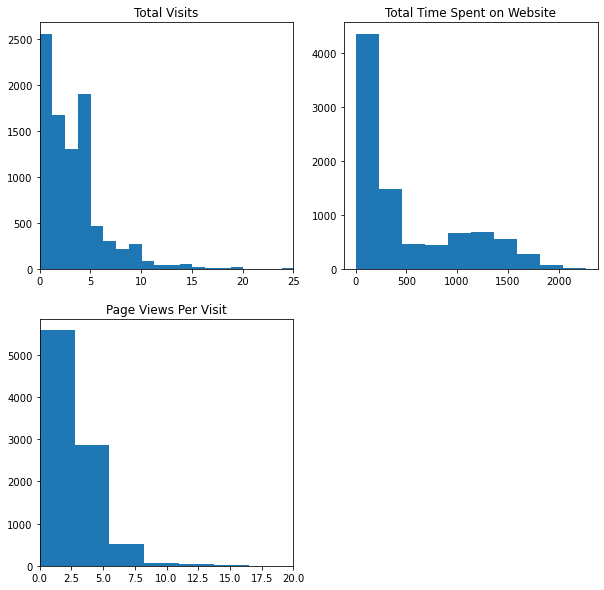

In [31]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.hist(df4['TotalVisits'], bins= 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(2,2,2)
plt.hist(df4['Total Time Spent on Website'], bins= 10)
plt.title('Total Time Spent on Website')


plt.subplot(2,2,3)
plt.hist(df4['Page Views Per Visit'], bins= 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

# <b> Related All the categorical Variables to Converted <b/>

Text(0.5, 1.0, 'Do Not Call')

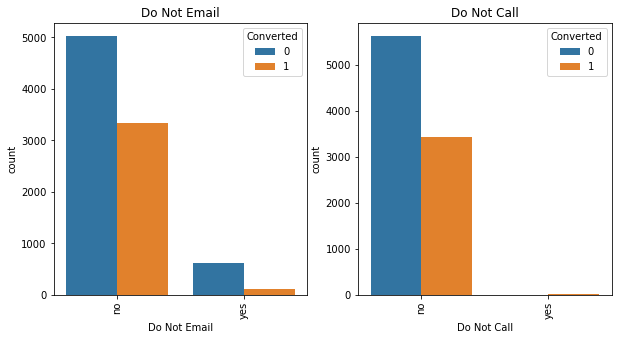

In [32]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email',hue='Converted',data=df4).tick_params(axis='x',rotation=90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call',hue='Converted',data=df4).tick_params(axis='x',rotation=90)
plt.title('Do Not Call')

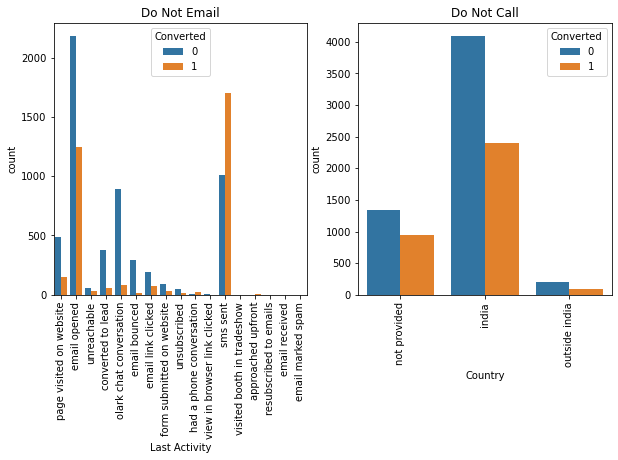

In [33]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity',hue='Converted',data=df4).tick_params(axis='x',rotation=90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Country',hue='Converted',data=df4).tick_params(axis='x',rotation=90)
plt.title('Do Not Call')

plt.show()

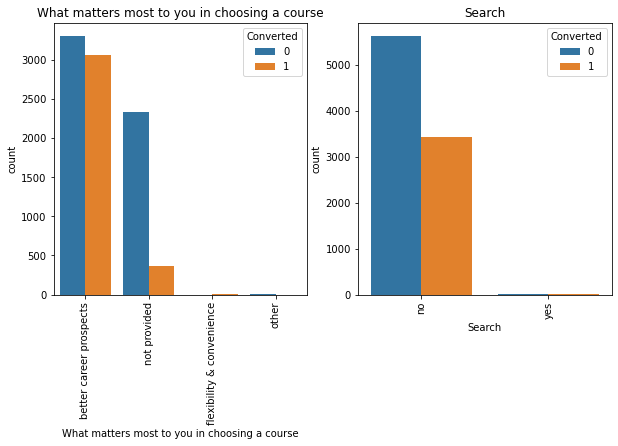

In [34]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course',hue='Converted',data=df4).tick_params(axis='x',rotation=90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search',hue='Converted',data=df4).tick_params(axis='x',rotation=90)
plt.title('Search')

plt.show()

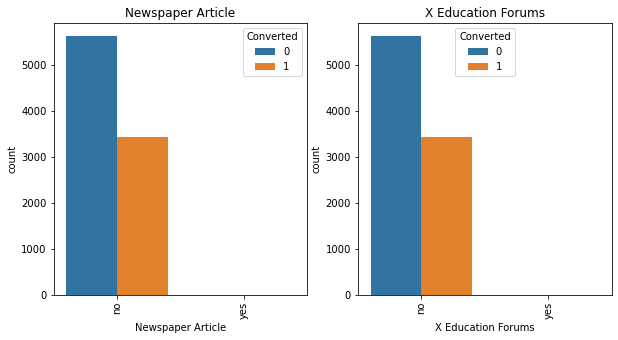

In [35]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article',hue='Converted',data=df4).tick_params(axis='x',rotation=90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums',hue='Converted',data=df4).tick_params(axis='x',rotation=90)
plt.title('X Education Forums')

plt.show()

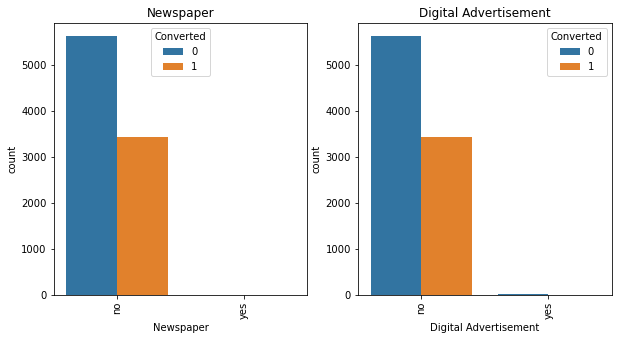

In [36]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper',hue='Converted',data=df4).tick_params(axis='x',rotation=90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement',hue='Converted',data=df4).tick_params(axis='x',rotation=90)
plt.title('Digital Advertisement')

plt.show()

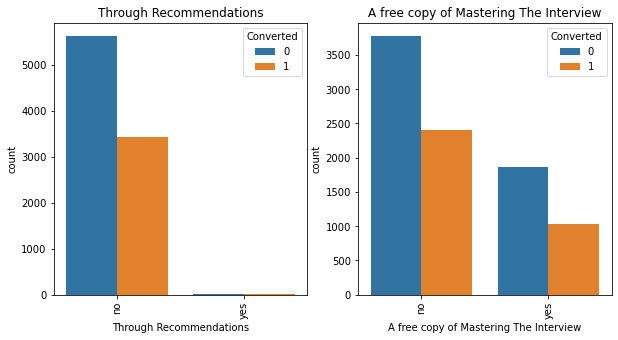

In [37]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations',hue='Converted',data=df4).tick_params(axis='x',rotation=90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview',hue='Converted',data=df4).tick_params(axis='x',rotation=90)
plt.title('A free copy of Mastering The Interview')

plt.show()

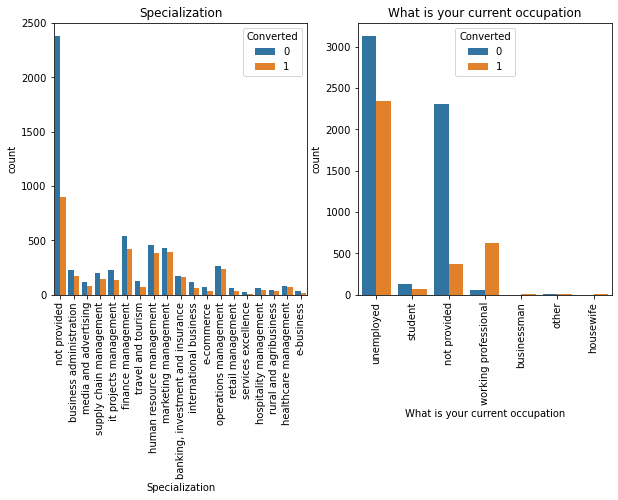

In [38]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='Specialization',hue='Converted',data=df4).tick_params(axis='x',rotation=90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation',hue='Converted',data=df4).tick_params(axis='x',rotation=90)
plt.title('What is your current occupation')

plt.show()

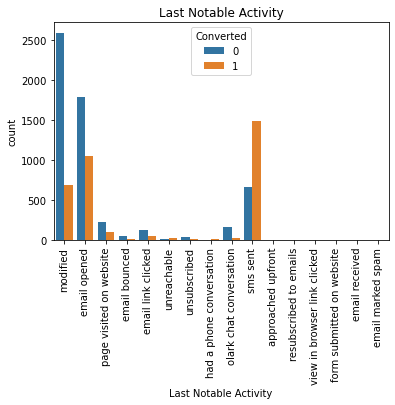

In [39]:
sns.countplot(x='Last Notable Activity',hue='Converted',data=df4).tick_params(axis='x',rotation=90)
plt.title('Last Notable Activity')

plt.show()

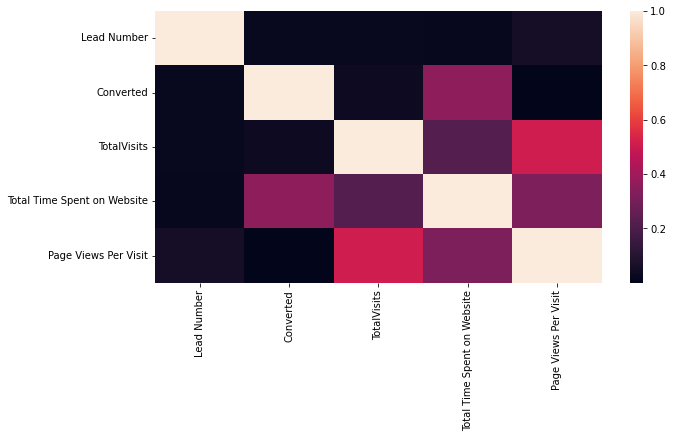

In [40]:
## heat map ##
plt.figure(figsize=(10,5))
sns.heatmap(df4.corr())
plt.show()

# <b>  by seeing Eda there are many elements have very little data  and so will be less relevance to our analysis<b/>

In [41]:
numeric=df4[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


# <b> Dummy Variables <b/>

In [42]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

In [43]:
df4.loc[:,df4.dtypes=='object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [44]:
dummy= pd.get_dummies(df4[['Lead Origin','Specialization','Lead Source','Do Not Email','Last Activity','What is your current occupation','A free copy of Mastering The Interview','Last Notable Activity']],drop_first=True)
df_dum=pd.concat([df4,dummy],axis=1)
df_dum

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,660737,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,...,0,0,1,0,0,0,0,0,0,0
1,660728,api,organic search,no,no,0,5.0,674,2.50,email opened,...,0,0,0,0,0,0,0,0,0,0
2,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,...,0,0,0,0,0,0,0,0,0,0
3,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,...,0,0,1,0,0,0,0,0,0,0
4,660681,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,...,0,0,0,0,0,0,0,0,0,0
9236,579546,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,...,0,0,0,0,0,0,1,0,0,0
9237,579545,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,...,0,0,0,0,0,0,1,0,0,0
9238,579538,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,...,0,0,0,0,0,0,1,0,0,0


In [45]:
df_dum=df_dum.drop(['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Country','Specialization','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums',"Specialization", 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'],1)
df_dum

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,660737,0,0.0,0,0.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.00,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.00,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.00,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,8.0,1845,2.67,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,579546,0,2.0,238,2.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,579545,0,2.0,199,2.00,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9238,579538,1,3.0,499,3.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# <b> Test -Train Split<b/>

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X= df_dum.drop(['Converted'],1)
X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,660737,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
## putting target variable in y ##
y=df_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [49]:
## splitting the data into 70% and 30% ##

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=10)

In [50]:
## scaling the 3 numeric features
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']]==scaler.fit_transform(X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])
X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,646334,2.0,1392,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3604,625970,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,607128,6.0,1708,6.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,590921,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,591639,2.0,1790,2.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


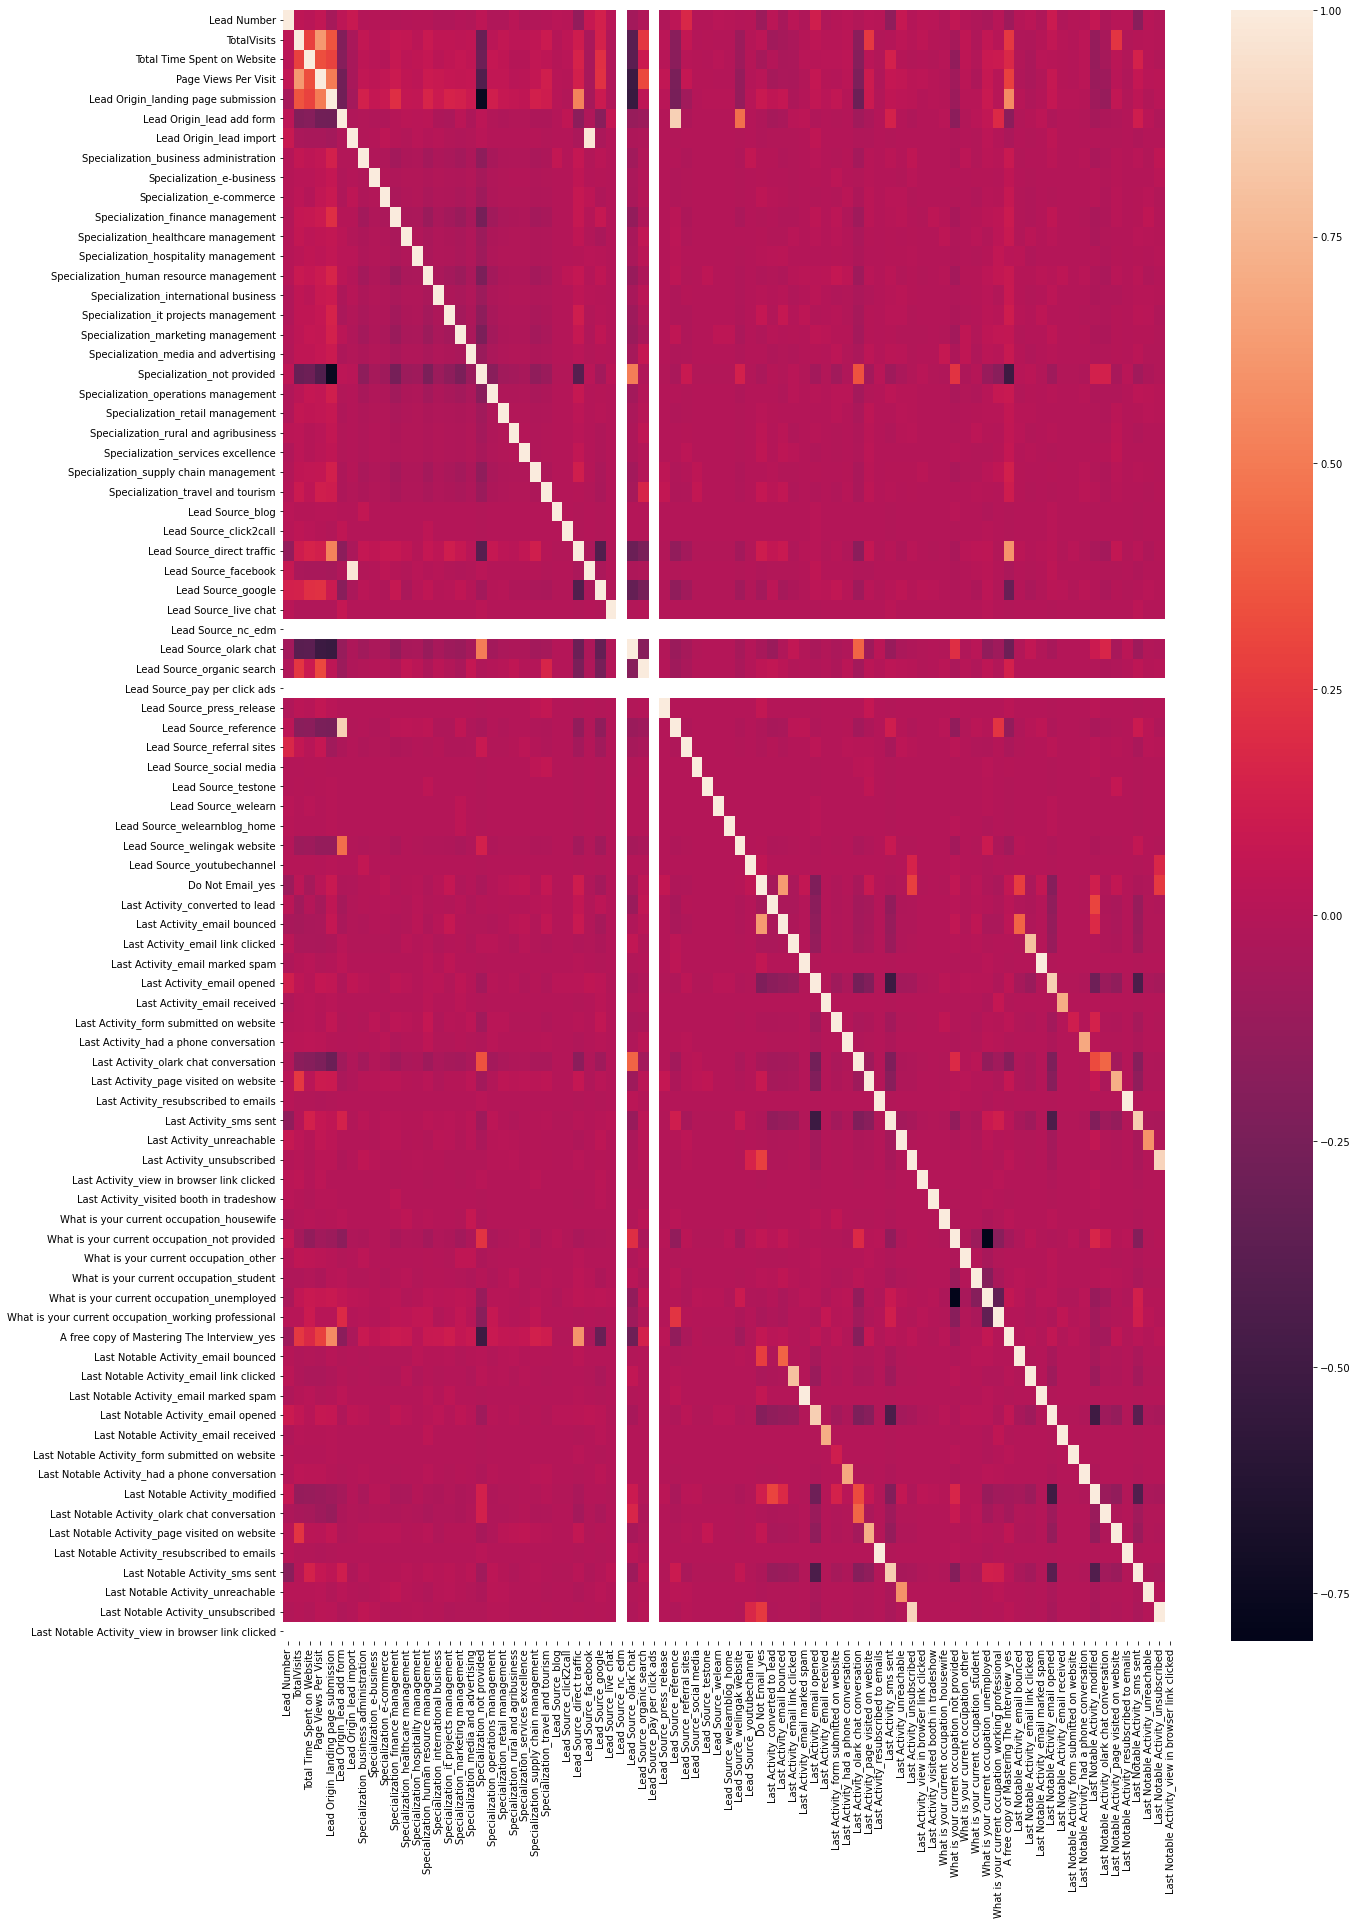

In [51]:
## checking coorr ##

plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

# <b> Model Building <b/>

In [52]:
## importing logestic regression ##

from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()

In [53]:
## import RFE ##

from sklearn.feature_selection import RFE

In [54]:
## running RFE ##

rfe=RFE(estimator=logreg , n_features_to_select=15)
rfe= rfe.fit(X_train,y_train)

In [55]:
## selecting features for RFE ##

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Lead Number', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 20),
 ('Lead Origin_landing page submission', False, 6),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 44),
 ('Specialization_business administration', False, 23),
 ('Specialization_e-business', False, 42),
 ('Specialization_e-commerce', False, 37),
 ('Specialization_finance management', False, 15),
 ('Specialization_healthcare management', False, 21),
 ('Specialization_hospitality management', False, 33),
 ('Specialization_human resource management', False, 11),
 ('Specialization_international business', False, 38),
 ('Specialization_it projects management', False, 34),
 ('Specialization_marketing management', False, 7),
 ('Specialization_media and advertising', False, 36),
 ('Specialization_not provided', True, 1),
 ('Specialization_operations management', False, 14),
 ('Specialization_retail management', False, 45),
 ('Speci

In [56]:
## putting all the columns selcted by rfe in col ##
col = X_train.columns[rfe.support_]

In [57]:
## selecting columns by rfe ##
X_train=X_train[col]

In [58]:
import statsmodels.api as sm

In [59]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.7
Date:                Fri, 14 Apr 2023   Deviance:                       5183.4
Time:                        09:49:15   Pearson chi2:                 6.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4045
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.8791      0.988     -7.978      0.000      -9.815      -5.943
Lead Number                                           9.887e-06   1.56e-06      6.323      0.000    6.82e-06     1.3e-05
TotalVisits                                              0.0290      0.010      2.954      0.003       0.010       0.048
Total Time Spent on Website                              0.0020   7.41e-05     27.282      0.000       0.002       0.002
Lead Origin_lead add form                                5.7363      0.727      7.886      0.000       4.311       7.162
Specialization_not provided                             -0.2609      0.090     -2.907      0.004      -0.437      -0.085
Lead Source_olark chat                                   1.6818      0.122     13.743      0.000       1.442       1.922
Lead Source_reference                                   -1.9433      0.753     -2.579      0.010      -3.420      -0.467
Do Not Email_yes                                        -1.3064      0.174     -7.507      0.000      -1.648      -0.965
Last Activity_olark chat conversation                   -1.0755      0.176     -6.113      0.000      -1.420      -0.731
Last Activity_sms sent                                   0.8193      0.162      5.067      0.000       0.502       1.136
What is your current occupation_not provided            -1.3648      0.217     -6.282      0.000      -1.791      -0.939
What is your current occupation_unemployed              -0.2913      0.207     -1.408      0.159      -0.697       0.114
What is your current occupation_working professional     2.2201      0.279      7.954      0.000       1.673       2.767
Last Notable Activity_modified                          -0.5536      0.096     -5.773      0.000      -0.742      -0.366
Last Notable Activity_sms sent                           0.5938      0.183      3.245      0.001       0.235       0.952
========================================================================================================================
"""

In [60]:
## importing variance inflamtion factor ##

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,42.27
11,What is your current occupation_unemployed,23.76
10,What is your current occupation_not provided,12.06
14,Last Notable Activity_sms sent,6.63
9,Last Activity_sms sent,6.37
3,Lead Origin_lead add form,4.79
6,Lead Source_reference,4.52
12,What is your current occupation_working profes...,3.82
13,Last Notable Activity_modified,2.45
4,Specialization_not provided,2.43


<b> vif value of do not email_yes p value arent <b/>

In [62]:
X_train.drop('Do Not Email_yes',axis=1 ,inplace =True)

In [63]:
## refit ##
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2625.0
Date:                Fri, 14 Apr 2023   Deviance:                       5249.9
Time:                        09:49:15   Pearson chi2:                 6.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3982
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -8.6149      0.981     -8.782      0.000     -10.538      -6.692
Lead Number                                           1.097e-05   1.55e-06      7.062      0.000    7.92e-06     1.4e-05
TotalVisits                                              0.0258      0.010      2.506      0.012       0.006       0.046
Total Time Spent on Website                              0.0020   7.35e-05     27.737      0.000       0.002       0.002
Lead Origin_lead add form                                5.6487      0.726      7.785      0.000       4.227       7.071
Specialization_not provided                             -0.2553      0.089     -2.854      0.004      -0.431      -0.080
Lead Source_olark chat                                   1.6963      0.122     13.852      0.000       1.456       1.936
Lead Source_reference                                   -1.8676      0.752     -2.484      0.013      -3.341      -0.394
Last Activity_olark chat conversation                   -1.0082      0.176     -5.742      0.000      -1.352      -0.664
Last Activity_sms sent                                   0.8594      0.160      5.379      0.000       0.546       1.173
What is your current occupation_not provided            -1.3506      0.214     -6.306      0.000      -1.770      -0.931
What is your current occupation_unemployed              -0.2752      0.204     -1.349      0.177      -0.675       0.125
What is your current occupation_working professional     2.2642      0.277      8.175      0.000       1.721       2.807
Last Notable Activity_modified                          -0.6253      0.095     -6.604      0.000      -0.811      -0.440
Last Notable Activity_sms sent                           0.5332      0.181      2.946      0.003       0.178       0.888
========================================================================================================================
"""

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,42.24
10,What is your current occupation_unemployed,23.76
9,What is your current occupation_not provided,12.05
13,Last Notable Activity_sms sent,6.60
8,Last Activity_sms sent,6.35
3,Lead Origin_lead add form,4.79
6,Lead Source_reference,4.52
11,What is your current occupation_working profes...,3.82
4,Specialization_not provided,2.43
12,Last Notable Activity_modified,2.39


<b> removing Last Activity_olark chat conversation p value disturb<b/>

In [65]:
X_train.drop('Last Activity_olark chat conversation',axis=1 ,inplace =True)

In [66]:
## refit ##
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2643.6
Date:                Fri, 14 Apr 2023   Deviance:                       5287.2
Time:                        09:49:16   Pearson chi2:                 6.64e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3947
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -8.7279      0.976     -8.943      0.000     -10.641      -6.815
Lead Number                                           1.113e-05   1.55e-06      7.201      0.000     8.1e-06    1.42e-05
TotalVisits                                              0.0241      0.010      2.371      0.018       0.004       0.044
Total Time Spent on Website                              0.0020   7.36e-05     27.686      0.000       0.002       0.002
Lead Origin_lead add form                                5.6712      0.726      7.817      0.000       4.249       7.093
Specialization_not provided                             -0.3177      0.089     -3.579      0.000      -0.492      -0.144
Lead Source_olark chat                                   1.5599      0.120     13.051      0.000       1.326       1.794
Lead Source_reference                                   -1.8645      0.752     -2.479      0.013      -3.339      -0.390
Last Activity_sms sent                                   1.0575      0.158      6.714      0.000       0.749       1.366
What is your current occupation_not provided            -1.3376      0.212     -6.297      0.000      -1.754      -0.921
What is your current occupation_unemployed              -0.2431      0.202     -1.202      0.229      -0.640       0.153
What is your current occupation_working professional     2.3079      0.277      8.347      0.000       1.766       2.850
Last Notable Activity_modified                          -0.7932      0.091     -8.724      0.000      -0.971      -0.615
Last Notable Activity_sms sent                           0.3682      0.180      2.050      0.040       0.016       0.720
========================================================================================================================
"""

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,42.23
9,What is your current occupation_unemployed,23.75
8,What is your current occupation_not provided,12.05
12,Last Notable Activity_sms sent,6.43
7,Last Activity_sms sent,6.08
3,Lead Origin_lead add form,4.79
6,Lead Source_reference,4.51
10,What is your current occupation_working profes...,3.82
2,Total Time Spent on Website,2.37
4,Specialization_not provided,2.37


<b> removing Lead Source_direct traffic p value disturb <b/>

In [68]:
X_train.drop('Lead Source_olark chat',axis=1 ,inplace =True)

In [69]:
## refit ##
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2734.2
Date:                Fri, 14 Apr 2023   Deviance:                       5468.3
Time:                        09:49:16   Pearson chi2:                 6.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3772
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.0234      0.943     -7.450      0.000      -8.871      -5.176
Lead Number                                           9.237e-06    1.5e-06      6.157      0.000     6.3e-06    1.22e-05
TotalVisits                                             -0.0095      0.010     -0.952      0.341      -0.029       0.010
Total Time Spent on Website                              0.0017    6.6e-05     25.929      0.000       0.002       0.002
Lead Origin_lead add form                                4.8726      0.722      6.752      0.000       3.458       6.287
Specialization_not provided                              0.1153      0.079      1.450      0.147      -0.041       0.271
Lead Source_reference                                   -1.6515      0.751     -2.198      0.028      -3.124      -0.179
Last Activity_sms sent                                   0.9923      0.153      6.502      0.000       0.693       1.291
What is your current occupation_not provided            -1.3328      0.208     -6.393      0.000      -1.741      -0.924
What is your current occupation_unemployed              -0.3015      0.198     -1.521      0.128      -0.690       0.087
What is your current occupation_working professional     2.2530      0.271      8.317      0.000       1.722       2.784
Last Notable Activity_modified                          -0.8127      0.090     -9.079      0.000      -0.988      -0.637
Last Notable Activity_sms sent                           0.3627      0.175      2.074      0.038       0.020       0.705
========================================================================================================================
"""

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,41.48
8,What is your current occupation_unemployed,23.75
7,What is your current occupation_not provided,12.04
11,Last Notable Activity_sms sent,6.42
6,Last Activity_sms sent,6.07
3,Lead Origin_lead add form,4.63
5,Lead Source_reference,4.50
9,What is your current occupation_working profes...,3.81
2,Total Time Spent on Website,2.20
1,TotalVisits,2.17


<b> know fix the model <b/>

# <b> Creating Prediction <b/>

In [71]:
## predicting the probabilities on the train set##

y_train_pred= res.predict(X_train_sm)
y_train_pred[:10]

1289    0.732656
3604    0.078784
5584    0.529307
7679    0.058265
7563    0.591778
7978    0.748384
7780    0.135864
7863    0.957212
838     0.787362
708     0.145721
dtype: float64

In [72]:
# reeshaping to an array 

y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.73265553, 0.07878423, 0.5293067 , 0.05826513, 0.5917784 ,
       0.74838432, 0.13586363, 0.95721242, 0.78736236, 0.1457214 ])

In [73]:
## data frame with given convertion rate and probability of predicted ones##

y_train_pred_final= pd.DataFrame({'Converted': y_train.values, 'Conversion_prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_prob
0,1,0.732656
1,0,0.078784
2,0,0.529307
3,0,0.058265
4,0,0.591778


In [74]:
# substituting 0 or 1 with cuttoff as 0.5

y_train_pred_final['Predicted']=y_train_pred_final.Conversion_prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted
0,1,0.732656,1
1,0,0.078784,0
2,0,0.529307,1
3,0,0.058265,0
4,0,0.591778,1


# <b> Model Evaluation <b/>

In [75]:
## importing metrics from sklearn for evaluation 
from sklearn import metrics

In [76]:
## creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion

array([[3435,  460],
       [ 796, 1660]], dtype=int64)

In [77]:
## predicted   not_churn   churn
#actual
#not_churn      3452        443
#churn           751        1705

In [78]:
# checking overall accuracy 

metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)

0.8022358683671863

<b> THat's around 80% acccuracy very goof value <b/>

In [79]:
## subtituing the value of true posituve 

TP = confusion[1,1]

#True Negative 

TN=confusion[0,0]

#False Negative

FP=confusion[0,1]

#False Negative

FN= confusion [1,0]



In [80]:
#calculating the sensitivity 

TP/(TP+FN)

0.6758957654723127

In [81]:
# calculating the Specificity 
TN/(TN+FP)

0.8818998716302953

<b> with current cut off 0.5 we have around 81% accuracy ,snesnitivity of around 70% and specificty of around 87% <b/>

# <b> Optimizse Cut OFF (ROC Curve) <b/>

In [88]:
## ROC function 

def draw_roc(actual,probs):
    fpr,tpr,thresolds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve(area = %0.2f)'% auc_score)
    plt.plot([0,1] ,[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate or [1-TRue Negative Rate]")
    plt.ylabel('True POsitive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

In [89]:
fpr, tpr, thresolds= metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Conversion_prob,drop_intermediate=False)

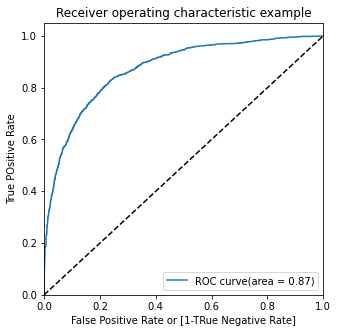

In [90]:
# Call the Roc Function

draw_roc(y_train_pred_final.Converted,y_train_pred_final.Conversion_prob)

# <b> ROC UNDER AREA IS 0.87 whic is good <b/>

In [92]:
## creating columns with different probability cutoffs##

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_prob.map(lambda x: 1 if x> i else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.732656,1,1,1,1,1,1,1,1,1,0,0
1,0,0.078784,0,1,0,0,0,0,0,0,0,0,0
2,0,0.529307,1,1,1,1,1,1,1,0,0,0,0
3,0,0.058265,0,1,0,0,0,0,0,0,0,0,0
4,0,0.591778,1,1,1,1,1,1,1,0,0,0,0


In [95]:
## creating data frame to see the values of accuracy ,sesnitivity,and specifivity at different values of probabilty cutoffs

cutoff_df=pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1= metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total1= sum(sum(cm1))
    accuracy= (cm1[0,0]+cm1[1,1])/total1
    
    speci=cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi=cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i]=[i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.590616,0.969870,0.351476
0.2,0.2,0.730909,0.904723,0.621309
0.3,0.3,0.785388,0.833062,0.755327
0.4,0.4,0.796253,0.770358,0.812580
0.5,0.5,0.802236,0.675896,0.881900
0.6,0.6,0.790269,0.581840,0.921694
0.7,0.7,0.775626,0.500407,0.949166
0.8,0.8,0.747756,0.395358,0.969961
0.9,0.9,0.705716,0.254479,0.990244


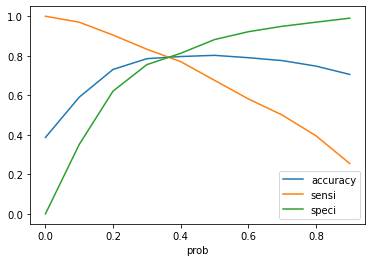

In [97]:
#plotting it

cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

<b> from the graph it is visible that optimal cutoff is at 0.35<b/>

In [98]:
y_train_pred_final['final_predicted']= y_train_pred_final.Conversion_prob.map(lambda x: 1 if x> 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.732656,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.078784,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.529307,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.058265,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.591778,1,1,1,1,1,1,1,0,0,0,0,1


In [99]:
## checking overal accuracy

metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

0.7915288930877027

In [101]:
## creating confusion matrix 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
confusion2

array([[3050,  845],
       [ 479, 1977]], dtype=int64)

In [102]:
## subtituing the value of true posituve 

TP = confusion2[1,1]

#True Negative 

TN=confusion2[0,0]

#False Negative

FP=confusion2[0,1]

#False Negative

FN= confusion2 [1,0]

In [103]:
# calculating senitivity 
TP/(TP+FN)

0.8049674267100977

In [104]:
#calculating the specificity 
TN/(TN+FP)

0.7830551989730423

<b> with current cutt of as 0.35 we have accuracy sensitivity and sepecitivity of around 80% <b/>

# <b> Prediction on Test Set <b/>

In [106]:
X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']]= scaler.transform(X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

In [107]:
## subtituting all the columns in the final train model

col= X_train.columns

In [108]:
# select the columns in X_train for X_test as well

X_test=X_test[col]
X_test_sm=sm.add_constant(X_test[col])
X_test_sm

,const,Lead Number,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Specialization_not provided,Lead Source_reference,Last Activity_sms sent,What is your current occupation_not provided,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_modified,Last Notable Activity_sms sent
8308,1.0,586397,0.035461,0.416813,0,0,0,0,0,1,0,1,0
7212,1.0,594083,0.028369,0.001320,0,0,0,1,0,0,1,0,1
2085,1.0,639518,0.000000,0.000000,1,1,0,0,0,1,0,0,0
4048,1.0,621209,0.028369,0.617077,0,0,0,1,0,1,0,0,1
4790,1.0,614037,0.028369,0.005282,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,628726,0.000000,0.000000,0,0,0,0,0,1,0,1,0
8179,1.0,587396,0.170213,0.148768,0,0,0,1,1,0,0,1,0
6236,1.0,601921,0.000000,0.000000,0,1,0,0,1,0,0,0,0
5240,1.0,609576,0.078014,0.458627,0,0,0,1,0,1,0,0,1


In [111]:
## storing prediction of test set in the variables Y_test_pred

y_test_pred=res.predict(X_test_sm)
# converting it to df 
y_pred_df= pd.DataFrame(y_test_pred)
# converting y_test to dataframe
y_test_df=pd.DataFrame(y_test)
#removing index #
y_pred_df.reset_index(drop=True , inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
## append y_test_df and y_pred df

y_pred_final= pd.concat([y_test_df,y_pred_df],axis=1)
# renaming column
y_pred_final=y_pred_final.rename(columns={0:'Conversion_prob'})
y_pred_final.head()

,Converted,Conversion_prob
0,0,0.061761
1,1,0.888124
2,1,0.972619
3,1,0.442473
4,0,0.160650


In [114]:
#making pred using cut off 0.35

y_pred_final['final_predicted']=y_pred_final.Conversion_prob.map(lambda x: 1 if x>0.35 else 0)
y_pred_final

,Converted,Conversion_prob,final_predicted
0,0,0.061761,0
1,1,0.888124,1
2,1,0.972619,1
3,1,0.442473,1
4,0,0.160650,0
...,...,...,...
2718,1,0.088659,0
2719,0,0.059958,0
2720,0,0.064097,0
2721,1,0.415973,1


In [122]:
# check overall accuracy 

metrics.accuracy_score(y_pred_final['Converted'],y_pred_final.final_predicted)

0.7774513404333456

In [142]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
confusion2

array([[3190,  705],
       [ 585, 1871]], dtype=int64)

In [143]:
## subtituing the value of true posituve 

TP = confusion2[1,1]

#True Negative 

TN=confusion2[0,0]

#False Negative

FP=confusion2[0,1]

#False Negative

FN= confusion2 [1,0]

In [144]:
# calculating senitivity 
TP/(TP+FN)

0.7618078175895765

In [145]:
#calculating the specificity 
TN/(TN+FP)

0.8189987163029525

# <b> Precision and Recall tradeoff <b/>

In [146]:
from sklearn.metrics import precision_recall_curve

In [147]:
y_train_pred_final.Converted,y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       1
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [148]:
p,r, thresold= precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Conversion_prob)

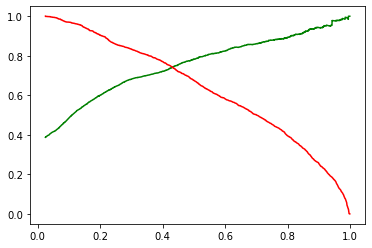

In [149]:
plt.plot(thresold, p[:-1], "g-")
plt.plot(thresold, r[:-1], "r-")
plt.show()

In [150]:
y_train_pred_final['final_predicted']= y_train_pred_final.Conversion_prob.map(lambda x: 1 if x>0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.732656,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.078784,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.529307,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.058265,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.591778,1,1,1,1,1,1,1,0,0,0,0,1


In [151]:
# accuracy

metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)


0.7968823807274446

In [152]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
confusion2

array([[3190,  705],
       [ 585, 1871]], dtype=int64)

In [153]:
## subtituing the value of true posituve 

TP = confusion2[1,1]

#True Negative 

TN=confusion2[0,0]

#False Negative

FP=confusion2[0,1]

#False Negative

FN= confusion2 [1,0]

In [156]:
# precesion 

TP/(TP+FP)

0.7263198757763976

In [157]:
##reacll

TP/(TP+FN)

0.7618078175895765

<b> with current cut off as 0.41 we have precision around 72% and recall around 76%<b/>

# <b> Prediction on Test set <b/>

In [158]:
## storing prediction of test set in the variables Y_test_pred

y_test_pred=res.predict(X_test_sm)
# converting it to df 
y_pred_df= pd.DataFrame(y_test_pred)
# converting y_test to dataframe
y_test_df=pd.DataFrame(y_test)
#removing index #
y_pred_df.reset_index(drop=True , inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
## append y_test_df and y_pred df

y_pred_final= pd.concat([y_test_df,y_pred_df],axis=1)
# renaming column
y_pred_final=y_pred_final.rename(columns={0:'Conversion_prob'})
y_pred_final.head()

,Converted,Conversion_prob
0,0,0.061761
1,1,0.888124
2,1,0.972619
3,1,0.442473
4,0,0.160650


In [160]:
y_pred_final['final_predicted']= y_pred_final.Conversion_prob.map(lambda x: 1 if x> 0.41 else 0)
y_pred_final

,Converted,Conversion_prob,final_predicted
0,0,0.061761,0
1,1,0.888124,1
2,1,0.972619,1
3,1,0.442473,1
4,0,0.160650,0
...,...,...,...
2718,1,0.088659,0
2719,0,0.059958,0
2720,0,0.064097,0
2721,1,0.415973,1


In [161]:
# check the overall acuraccy

metrics.accuracy_score(y_pred_final['Converted'],y_pred_final.final_predicted)

0.7906720528828498

In [173]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
confusion2

array([[3190,  705],
       [ 585, 1871]], dtype=int64)

In [174]:
## subtituing the value of true posituve 

TP = confusion2[1,1]

#True Negative 

TN=confusion2[0,0]

#False Negative

FP=confusion2[0,1]

#False Negative

FN= confusion2 [1,0]

In [175]:
# precesion 

TP/(TP+FP)

0.7263198757763976

In [176]:
##reacll

TP/(TP+FN)

0.7618078175895765

# <b>Conclusion <b/>

<b>variables that are most matter are in descending order <b/>

<b>1. The total time spend on the website <b/>

<b> 2. total no of visits<b/>

<b>3.when the lead source was ; <b/>

<b> a. google<b/>

<b>b.direct traffic <b/>

<b>c. organic search <b/>

<b>d. welingak website <b/>

<b> 4. when the last activity was:<b/>

<b>a. sms <b/>

<b>b. olark chat conversation <b/>

<b>5. when the lead origin is lead add format <b/>